In [2]:
import sys
import os
import mxnet as mx
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('../python')

from ml.utils.get_data import get_mnist_iter

In [3]:
mnist_train_iter, mnist_test_iter = get_mnist_iter(32)

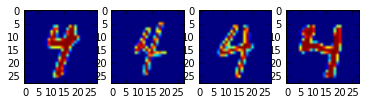

In [4]:
batch = mnist_train_iter.next()
four_images = batch.data[0][0:4]

for i in range(4):
    plt.subplot(1, 4, i + 1)
    img = mx.nd.reshape(four_images[i], (28, 28)).asnumpy() * 255
    plt.imshow(img.astype(np.uint8))

plt.show()
mnist_train_iter.reset()

In [5]:
net = mx.sym.var('data')
net = mx.sym.Convolution(data = net, kernel = (3, 3), num_filter=64, stride=(1, 1), pad=(1, 1), name = 'conv1')
net = mx.sym.Activation(data = net, act_type = 'relu', name = 'relu1')
net = mx.sym.Convolution(data = net, kernel = (3, 3), num_filter=64, stride=(1, 1), pad = (1, 1), name = 'conv2')
net = mx.sym.Activation(data = net, act_type = 'relu', name = 'relu2')
net = mx.sym.Pooling(data = net, stride = (2, 2), pad=(0, 0), kernel=(2, 2), pool_type = 'max', name = 'pool1')
net = mx.sym.FullyConnected(data = net, num_hidden=64, name = 'fc1')
net = mx.sym.Activation(data = net, act_type = 'relu', name = 'relu3')
net = mx.sym.FullyConnected(data = net, num_hidden = 10, name = 'fc2')
net = mx.sym.SoftmaxOutput(data = net, name='softmax')

net.list_arguments()
net.list_inputs()

['data',
 'conv1_weight',
 'conv1_bias',
 'conv2_weight',
 'conv2_bias',
 'fc1_weight',
 'fc1_bias',
 'fc2_weight',
 'fc2_bias',
 'softmax_label']

In [6]:
model = mx.mod.Module(context = mx.gpu(), symbol = net, data_names = ['data'], label_names = ['softmax_label'])
model.bind(data_shapes=mnist_train_iter.provide_data, label_shapes = mnist_train_iter.provide_label)
model.init_params(initializer=mx.initializer.Xavier(magnitude=2.24))
model.init_optimizer(optimizer='sgd', optimizer_params={'learning_rate' : 0.0003, 'momentum' : 0.95})

In [7]:
metric = mx.metric.Accuracy()
epochs = 20

for epoch in range(epochs):
    mnist_train_iter.reset()
    metric.reset()
    
    for batch in mnist_train_iter:
        model.forward(batch, is_train=True)
        #predictions = mx.nd.argmax(model.get_outputs()[0], axis = 1)
        model.update_metric(metric, batch.label)
        model.backward()
        model.update()
    
    print('Epoch %d, Training accuracy %s' % (epoch, metric.get()))
    val_metric = mx.metric.Accuracy()
    val_metric.reset()
    print('Epoch %d, Test accuracy %s' % (epoch, model.score(eval_data=mnist_test_iter, eval_metric=val_metric)))

Epoch 0, Training accuracy ('accuracy', 0.43646666666666667)
Epoch 0, Test accuracy [('accuracy', 0.6831070287539937)]
Epoch 1, Training accuracy ('accuracy', 0.7788333333333334)
Epoch 1, Test accuracy [('accuracy', 0.8342651757188498)]
Epoch 2, Training accuracy ('accuracy', 0.8436833333333333)
Epoch 2, Test accuracy [('accuracy', 0.8523362619808307)]
Epoch 3, Training accuracy ('accuracy', 0.8597666666666667)
Epoch 3, Test accuracy [('accuracy', 0.8653154952076677)]
Epoch 4, Training accuracy ('accuracy', 0.8707166666666667)
Epoch 4, Test accuracy [('accuracy', 0.8759984025559105)]
Epoch 5, Training accuracy ('accuracy', 0.8808833333333334)
Epoch 5, Test accuracy [('accuracy', 0.8855830670926518)]
Epoch 6, Training accuracy ('accuracy', 0.8904833333333333)
Epoch 6, Test accuracy [('accuracy', 0.8912739616613419)]
Epoch 7, Training accuracy ('accuracy', 0.89855)
Epoch 7, Test accuracy [('accuracy', 0.8987619808306709)]
Epoch 8, Training accuracy ('accuracy', 0.90695)
Epoch 8, Test acc